# Project 3 - autograded project

## Examining the geometry of molecules

Molecular geometry is the three-dimensional arrangement of atoms within a molecule. This geometry is often described by considering the lengths and angles of the bonds within the system. If we consider a central atom with 4 bonds to other atoms / molecules these are two of the three-dimensional shapes this system could take: either a **Square planar** shape or a **Tetrahedral** shape, both shown below.

Square Planar

![Square planar](Square-planar-shape-with-angle.png)

Tetrahedral

![Tetrahedral](Tetrahedral-shape-with-angle.png)

Both the Square Planar and Tetrahedral shapes are symmetric when they are rotated (rotationally symmetric). In an ideal system:
 - For the square planar shape, each of the four bonds (along the plane) has an angle of $90^{\mathrm{o}}$
 - For the tetrahedral shape, each of the four bonds has an angle of $109.5^{\mathrm{o}}$

### Data files

For this project, we have provided two data files containing the measured bond angles for different systems with a central atom and four surrounding bonds (to other atoms or molecules).
1. With Rhodium (Rh) as the central atom
2. With Cobalt (Co) as the central atom

In both cases, we expect the majority of these systems to be either Square Planar (all angles of $90^{\mathrm{o}}$) or Tetrahedral (all angles of $109.5^{\mathrm{o}}$) in shape.

First 5 rows of "Rh_CN4-molecules.csv"
```
# Missing entries are shown as -999 value.
Query,Refcode,ANG1,ANG2,ANG3,ANG4,R-factor,Study Temp.
1,ABANEX,86.286,91.877,91.402,90.744,4.110,150
1,ABEJIA,98.505,100.045,83.356,79.567,4.160,120
1,ABEJOG,100.686,99.261,78.550,82.795,3.910,120
```

First 5 rows of "Co_CN4-molecules.csv"
```
# Missing entries are shown as -999 value.
Query,Refcode,ANG1,ANG2,ANG3,ANG4,R-factor,Study Temp.
2,ABEBUG,107.775,104.241,106.684,115.986,2.920,150
2,ABECER,119.168,107.584,103.463,105.580,4.860,150
2,ABECIV,109.473,104.126,109.126,120.683,3.330,150
```

Column details:
 - "Query" - Database query number (*can ignore*)
 - "Refcode" - Reference code for the molecular structure
 - "ANG1", "ANG2", "ANG3", "ANG4" - Values in degrees for each of the four bond angles
 - "R-factor" - Reliability factor. This is a measure of the quality of the data where a lower value is better
 - "Study Temp." - Temperature used when completing the measurements.

The overall aim of this project is to examine these data files and see how well these two different molecular shapes (Square Planar and Tetrahedral) can be distinguished within this data using the ideal angles.

---

## Part 1 - overall properties

The first part of this assessment deals with reading, manipulating and plotting the data to show the overall details for the bond angles.

**Read the "Rh_CN4-molecules.csv" and "Co\_CN4-molecules.csv" data sets, analyse the bond angles and plot the distributions.**

***1. Using Python, read the data from these files considering the following:***
  - How the data files are laid out and how best to read the data
  - How to handle any missing data

## Task 1

Using `pandas`, complete the following code, defining

In [1]:
import pandas as pd

filename_Rh = "Rh_CN4-molecules.csv"
filename_Co = "Co_CN4-molecules.csv"

# Read in data:
# - Take account of top header row (e.g. skiprows=1)
# - Take account of missing values represented -999 (e.g. na_values="-999")
# - Set index to "Refcode" (optional but helps later on)
df_rh = pd.read_csv(filename_Rh, skiprows=1, na_values="-999", index_col="Refcode")
df_co = pd.read_csv(filename_Co, skiprows=1, na_values="-999", index_col="Refcode")

***2. Consider the average and spread of the bond angles for both data sets***

   - Calculate the mean for each molecule (row) across all four bond angle columns (i.e. total divided by 4). You may wish to add this as an additional column.
   - For this new column (Series), calculate the mean and standard deviation to compare against the ideal angles for the Square Planar and Tetrahedral shapes. Use clear print statements and/or text (markdown) cells.

In [2]:
# Calculate the mean for each molecule (row) across all four bond angles
df_rh["ANG_MEAN"] = (df_rh["ANG1"] + df_rh["ANG2"] + df_rh["ANG3"] + df_rh["ANG4"])/4.
df_co["ANG_MEAN"] = (df_co["ANG1"] + df_co["ANG2"] + df_co["ANG3"] + df_co["ANG4"])/4.

In [3]:
# Define the ideal angles for the two shapes
square_planar = 90
tetrahedral = 109.5

In [4]:
# Calculate mean and standard deviation for the average angle
angle_mean_rh = df_rh["ANG_MEAN"].mean()
angle_std_rh = df_rh["ANG_MEAN"].std()

angle_mean_co = df_co["ANG_MEAN"].mean()
angle_std_co = df_co["ANG_MEAN"].std()

In [5]:
# Calculate the differences from the ideal angles
diff_rh_square_planar = angle_mean_rh - square_planar
diff_co_square_planar = angle_mean_co - square_planar

diff_rh_tetrahedral = angle_mean_rh - tetrahedral
diff_co_tetrahedral = angle_mean_co - tetrahedral

In [6]:
# OPTIONAL - creating a DataFrame to display this in a nicely formatted table
comparison_dict = {"Mean":[angle_mean_rh, angle_mean_co], 
                   "Standard deviation": [angle_std_rh, angle_std_co],
                   "Square planar (diff)": [diff_rh_square_planar, diff_co_square_planar],
                   "Tetrahedral (diff)": [diff_rh_tetrahedral, diff_co_tetrahedral]}

comparison_df = pd.DataFrame(comparison_dict, index=["Rh molecules","Co molecules"])
comparison_df

,Mean,Standard deviation,Square planar (diff),Tetrahedral (diff)
Rh molecules,90.194989,1.350200,0.194989,-19.305011
Co molecules,105.116587,7.865554,15.116587,-4.383413


**Discussion**:

From comparison to the mean bond angle, our Rhodium molecules seem closest to the ideal angle for a Square Planar shape. For our Cobalt molecules these seem closest to the ideal angle for a Tetrahedral shape but this does show more spread in the data (standard deviation of 7.9 compared to 1.4 for Rhodium).

***3. From these data sets, create at least one plot to show the distribution of these bond angles for both data sets considering:***
   - How to present this data in a clear way
   - How to make sure the plot(s) are self-contained and include all the relevant information

Text(0.5, 0, 'Mean angle ($^o$)')

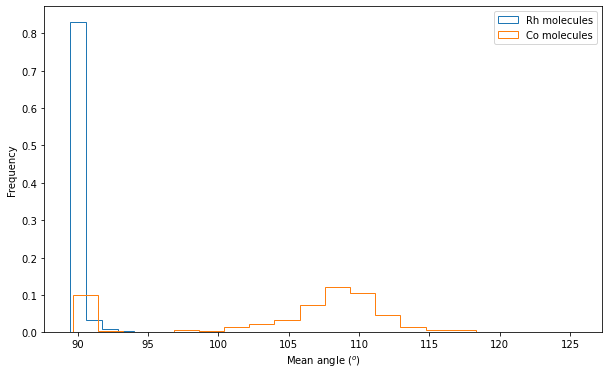

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

## Plot histograms for Rh vs Co for the mean bond angle
# - Choosing consistent number of bins for both inputs (Rh and Co)
# - Plotting as a density to allow for a consistent comparison between Rh and Co
# - Choosing histtype of "step" for overlapping histograms (could have chosen transparency)
# - Making sure each data set is clearly labelled (legend)
# - Labelling the axes (including LaTeX for superscript)

num_bins=20

df_rh.plot.hist(y="ANG_MEAN", ax=ax, histtype="step", density=True, bins=num_bins, label="Rh molecules")
df_co.plot.hist(y="ANG_MEAN", ax=ax, histtype="step", density=True, bins=num_bins, label="Co molecules")

ax.set_xlabel("Mean angle ($^o$)") # Label x axis

Text(0.5, 0, 'Mean angle ($^o$)')

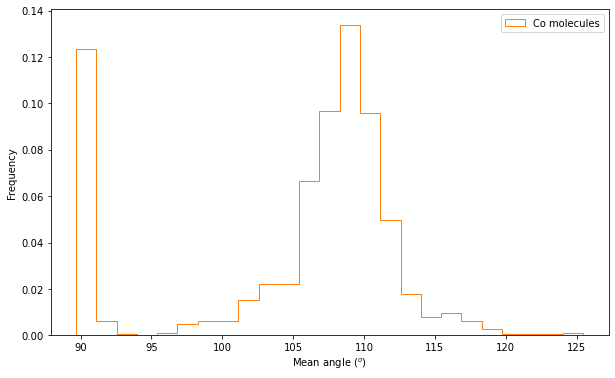

In [8]:
# Optional - could plot Cobalt separately to see this more clearly
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

num_bins=25

df_co.plot.hist(y="ANG_MEAN", ax=ax, histtype="step", density=True, bins=num_bins, color="C1", label="Co molecules")

ax.set_xlabel("Mean angle ($^o$)") # Label x axis

---

## Part 2 - individual molecules

After looking at the properties of the data sets as a whole, we can consider what this could tell about each individual molecule.

**Based on your analysis so far, decide on the most likely shape for individual molecules.**

***1. Select the rows using the *Refcode* values for a set of molecules and predict their shape***
 - Use these Refcode values
   - "YIQQUK" (Rh)
   - "ZOJPUJ01" (Co)
   - "ICAYES" (Co)
   - "ZABVIK" (Co)
 - Based on the angles, comment on the likelihood of each of these molecules being Square planar or Tetrahedral. Use clear print statements and/or text (markdown) cells.

In [9]:
# Find the molecule (row) related to the reference code values
rh_code = "YIQQUK"
co_codes = ["ZOJPUJ01", "ICAYES", "ZABVIK"]

rh_molecule_row = df_rh.loc[rh_code]
print(f"Ref code: {rh_code}")
print(rh_molecule_row, "\n")

for code in co_codes:
    molecule_row = df_co.loc[code]
    print(f"Ref code: {code}")
    print(molecule_row, "\n")

Ref code: YIQQUK
Query            1.00000
ANG1            89.40700
ANG2            90.51100
ANG3            91.37200
ANG4            88.69100
R-factor         3.08000
Study Temp.    296.00000
ANG_MEAN        89.99525
Name: YIQQUK, dtype: float64 

Ref code: ZOJPUJ01
Query            2.000
ANG1            97.016
ANG2           107.569
ANG3            97.501
ANG4           106.162
R-factor         4.950
Study Temp.    100.000
ANG_MEAN       102.062
Name: ZOJPUJ01, dtype: float64 

Ref code: ICAYES
Query            2.000
ANG1           116.386
ANG2           109.928
ANG3           113.829
ANG4           104.237
R-factor         2.240
Study Temp.    100.000
ANG_MEAN       111.095
Name: ICAYES, dtype: float64 

Ref code: ZABVIK
Query            2.00000
ANG1            96.31200
ANG2            86.19000
ANG3            82.37700
ANG4            95.20800
R-factor         3.48000
Study Temp.    130.00000
ANG_MEAN        90.02175
Name: ZABVIK, dtype: float64 



In [10]:
# Optional - extract and present this as a DataFrame
rh_molecule_row = df_rh.loc[[rh_code]]
rh_molecule_row

,Query,ANG1,ANG2,ANG3,ANG4,R-factor,Study Temp.,ANG_MEAN
Refcode,,,,,,,,
YIQQUK,1,89.407,90.511,91.372,88.691,3.08,296.0,89.99525


In [11]:
# Optional - extract and present this as a DataFrame
co_molecule_rows = df_co.loc[co_codes]
co_molecule_rows

,Query,ANG1,ANG2,ANG3,ANG4,R-factor,Study Temp.,ANG_MEAN
Refcode,,,,,,,,
ZOJPUJ01,2,97.016,107.569,97.501,106.162,4.95,100.0,102.06200
ICAYES,2,116.386,109.928,113.829,104.237,2.24,100.0,111.09500
ZABVIK,2,96.312,86.190,82.377,95.208,3.48,130.0,90.02175


**Discussion:**

- "YIQQUK" - based on the mean angle of $90.0^\circ$, this is most likely square planar. This is also part of the Rhodium sample which seems to be predominantly square planar based on the overall distribution.
 - "ZOJPUJ01" - even though the mean angle of $102.1^\circ$ is between the two ideal systems, this is more likely to be tetrahedral based on the distribution of angles within the Cobalt sample shown above.
 - "ICAYES" - based on the mean angle of $111.1^\circ$ this is most likely tetrahedral when compared with the ideal angle of $109.5^\circ$.
 - "ZABVIK" - based on the mean angle of $90.0^\circ$ this is most likely to be square planar when compared with the ideal angle of $90.0^\circ$.

***2. For the Cobalt (Co) data, add a column predicting whether the most likely shape of each molecule (row) is Square planar.***
   - Based on your analysis so far, choose a cut off value for your bond angle (individual or mean) below which you may expect the most likely shape to be Square planar.
   - Create a new column indicating whether each molecule (row) is predicted to be "square planar" (e.g. containing True/False values).
   - Check this aligns with your predictions in the previous question.

In [12]:
cutoff = 95
square_planar = df_co["ANG_MEAN"] < cutoff
df_co["square_planar"] = square_planar
df_co

,Query,ANG1,ANG2,ANG3,ANG4,R-factor,Study Temp.,ANG_MEAN,square_planar
Refcode,,,,,,,,,
ABEBUG,2,107.775,104.241,106.684,115.986,2.92,150.0,108.67150,False
ABECER,2,119.168,107.584,103.463,105.580,4.86,150.0,108.94875,False
ABECIV,2,109.473,104.126,109.126,120.683,3.33,150.0,110.85200,False
ADABUF,2,119.241,116.939,106.037,96.050,2.90,100.0,109.56675,False
ADACIU,2,90.496,90.187,90.369,89.367,3.86,100.0,90.10475,True
...,...,...,...,...,...,...,...,...,...
ZOZGAW,2,96.763,121.109,96.763,120.812,3.34,295.0,108.86175,False
ZZZBLD01,2,120.941,96.174,118.148,96.179,3.51,296.0,107.86050,False
ZZZVBA01,2,95.435,116.914,95.435,116.914,2.48,153.0,106.17450,False


In [13]:
df_co.loc["ZABVIK"]["square_planar"]

True

In [14]:
df_co.loc["ZOJPUJ01"]["square_planar"]

False

This aligns with the predictions made above.

---